# Predict the credit card fraud detection using machine learning algorithm 'Logistic Regression'

###  Dataset: Synthetic Financial Datasets For Fraud Detection (Link: https://www.kaggle.com/datasets/ealaxi/paysim1) original datset containing 200k transactions. 
### for this project, I have used 1k transactions. Which is saved as 'transactions_modified.csv' in the same directory.
### Goal of this project is to use Logistic Regression and create a predicive model to determing if a transaction is fraud or not. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# Install seaborn
%pip install seaborn
import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the dataset

transactions = pd.read_csv('/Users/ellie/Desktop/Engineering (learning Materials)/ProjectApe/Training Models/transactions_modified.csv')
print(transactions.head())
print(transactions.info())

# I have loaded the dataset into a pandas dataframe and printed the first 5 rows of the dataset to understand the data. 
# I have used .info() to examine how many rows are there and what data types are there in the dataset.


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):


In [5]:
# How many fraudulant transactions are there?

fraudulent_transactions = transactions['isFraud'].sum()
print(f"Number of fraudulent transactions: {fraudulent_transactions}")

Number of fraudulent transactions: 9


In [6]:
# Summary statistics on amount column 

transactions['amount'].describe()

count    9.990000e+02
mean     1.183156e+05
std      2.485772e+05
min      8.730000e+00
25%      4.495580e+03
50%      1.489551e+04
75%      1.428632e+05
max      2.545478e+06
Name: amount, dtype: float64

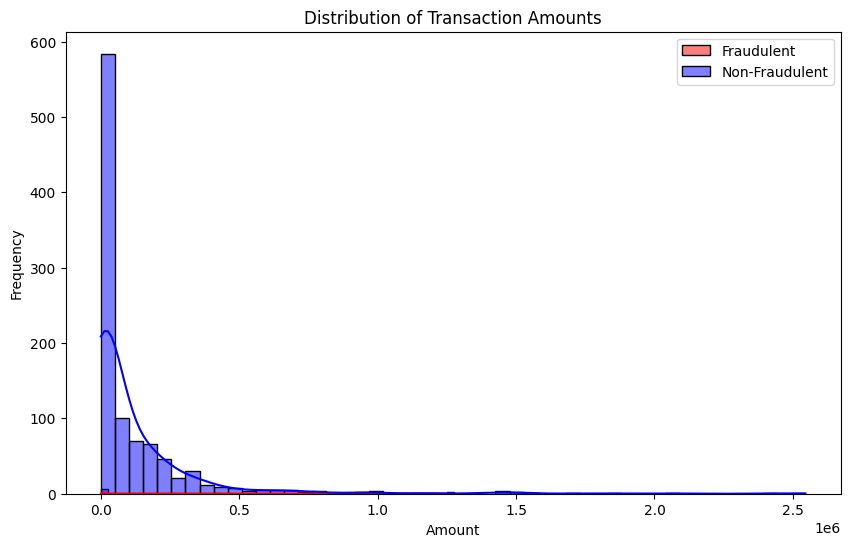

In [7]:
# I have calculated the number of fraudulent transactions in the dataset and printed the summary statistics of the amount column.
# Now, I will plot the distribution of the amount column for fraudulent and non-fraudulent transactions.
plt.figure(figsize=(10, 6))
sns.histplot(transactions[transactions['isFraud'] == 1]['amount'], bins=50, color='red', label='Fraudulent', kde=True)
sns.histplot(transactions[transactions['isFraud'] == 0]['amount'], bins=50, color='blue', label='Non-Fraudulent', kde=True)
plt.legend()
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [8]:
# create isPayment field
# There is a lot of information about the type of transaction in the 'type' column. such as 'CASH_OUT', 'TRANSFER', 'DEBIT', 'CASH_IN', 'PAYMENT'.
# I will create a new column 'isPayment' which will be 1 if the transaction type is 'PAYMENT' or 'Debit' and 0 otherwise.

transactions['isPayment'] = transactions['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)


In [9]:
# Create isMovement field
# I will create a new column 'isMovement'which will capture if money move out of the original account. This column will be 1 if the transaction type is 'CASH_OUT' or 'TRANSFER' and 0 otherwise.

transactions['isMovement'] = transactions['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)

In [10]:
# Create accountDiff field
# With financil fraud, another key factor to investigage would be the different in value between the original and destination account. (in this case, assumption is that destination accounts 
# with a significantly different value could be suspect of fraud) 

# I will create a column called 'accountDiff' which will be the difference between the oldbalanceOrg and oldbalanceDest columns.

transactions['accountDiff'] = transactions['oldbalanceOrg'] - transactions['oldbalanceDest']


In [11]:
# Create features and label variables

# Before I can start training the model, I need to define the features and label columns. My label column in this dataset is the 'iFraud' field. I will create a variable called features which will be an array consisting of the folllowing fields:
# 'amount', 'isPayment', 'isMovement', 'accountDiff'
# I will also create a variable called 'label' with the the column 'isFraud'.

features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
label = transactions['isFraud']


In [12]:
# Split Data into Training and Testing Sets
# I will split the data into training and test sets using sklearn's train_test_split() method. I will use the training set to train the model and the test set to evaluate the model. 
# Using a test_size value of 0.3 will split the data into 70% training and 30% testing.

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

In [13]:
# Normalize the features variable 

# Since sklearn's Logistic Regression uses Regularization, I will need to scale the features data. Create a StandardScaler object, .fit_trandorm() it on the training features, an .transform() the test features.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Fit the model to the training data 

# I will create a LogisticRegression model with sklearn and .fit() it on the training data.  
# Fitting the model find the best coefficients for my selected features so it can more accurately predit the label column. 
# I will start with the default threshold of 0.5.

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
 # Score the model on the training data 
# I will run the model's .score() method on the training data and print the training score. 
# Scoring the model on the training data will process the training data through the trained model and will predict which transactions are fraudulent. 
# The score returned is the percentage of correct classifications, or the accuracy of the model on the training data.

training_score = model.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.994277539341917


In [16]:
#Score the model on the test data 
# I will run the model's .score() method on the test data and print the test score.
# Scoring the model on the test data will process the test data through the trained model and will predict which transactions are fraudulent. 
# The score returned is the percentage of correct classifications, or the accuracy, and will be an indicator for the succes of the model. 

test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score}")


Test Score: 0.9833333333333333


In [17]:
# Print the coefficients of the model
# I will print the coefficients of the model to see how important each feature is in predicting the label column.

print(f"Coefficients: {model.coef_}")

Coefficients: [[ 0.59066445 -0.20123238  1.30647493  0.99477337]]


## I have trained a Logistic Regression model to predict fraudulent transactions in the dataset.

In [18]:
# New Transaction Data 
# Now, I will use my trained model to process more transactions that have not been seen before. These are three numpy arrays with the following values:
# I will create a new dataframe with the following transactions:

transaction1 = np.array([123456.78, 0.0, 1.0, 54679.1])
transaction2 = np.array([98765.46, 1.0, 0.0, 8525.75])
transaction3 = np.array([583878.31, 1.0, 0.0, 510023.5])

In [19]:
# Create a another  new transactions 
# I will creae a fourth arrat, your_transaction, and add the trannsaction information i would like to test the model with.I will have to make sure to enter all values as floats with a . at the end.

your_transaction = np.array([6472.54, 1.0, 0.0, 55908.23])


In [20]:
# Combine new transactions into a single numpy array
#  I will combine the new transactions and your_transaction into a single numpy array called sample_transactions.

sample_transactions = np.array([transaction1, transaction2, transaction3, your_transaction])

In [21]:
# Normalise the new transactions 
#  Since the Logictic Regression model was trained on scaled feature data,
# I must also scale the feature data I am making prediction on. 
#  Using the StandardScaler object I created earlier, apply its .transform() method to the sample_transactions array and store the result in a new variable called sample_transactions.

sample_transactions = scaler.transform(sample_transactions)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Predict fraud on the new transactions
# Which transactions are fraudulent? I will use the model's .predict() method on the sample_transactions array to predict which transactions are fraudulent.
#  Want to see the probabilities that let the model make the decision? I will use the model's .predict_proba() method on the sample_transactions array to see the probabilities of each transaction being fraudulent.

predictions = model.predict(sample_transactions)
probabilities = model.predict_proba(sample_transactions)


In [23]:
print (model.predict(sample_transactions))

[0 0 0 0]


In [24]:
# Show probabilities on the new transactions

print(model.predict_proba(sample_transactions))

[[9.89587373e-01 1.04126275e-02]
 [9.99591158e-01 4.08842122e-04]
 [9.98517141e-01 1.48285887e-03]
 [9.99662244e-01 3.37755586e-04]]


In [25]:
print(model.predict_proba(sample_transactions)[:,1])

[0.01041263 0.00040884 0.00148286 0.00033776]


In [27]:
import pickle

# Assuming 'model' is your trained model
with open("fraud_detection_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)